**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

**First, import the cleaned data set. Then, select the features from the DataFrame of the case study data.**
    
These features should be: `'LIMIT_BAL'`, `'EDUCATION'`, `'MARRIAGE'`, `'AGE'`, `'PAY_1'`, `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`, `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, AND `'PAY_AMT6'`.

In [3]:
# Import data set
df = pd.read_csv("Task 1 Data set/cleaned_data.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
# Create features list
df_2 = df.drop(["ID","SEX","EDUCATION_CAT","graduate school",'high school','others','university'],axis=1)
X = df_2.drop(["default payment next month"], axis = 1)
Y = df_2['default payment next month']

_____________________________________________________
**Next, make a 80:20 train/test split using a random seed of 24.**

In [5]:
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,random_state = 24,test_size = 0.20)

_____________________________________________________
**Then, instantiate the `MinMaxScaler` to scale the data.**

In [6]:
scaler = MinMaxScaler()

_____________________________________________________
**Next, instantiate a logistic regression model with the `saga` solver, L1 penalty, and set `max_iter` to 1,000 as we want the solver to have enough iterations to find a good solution.**

In [7]:
l_r_model = LogisticRegression(solver='saga',max_iter = 1000)

_____________________________________________________
**Next, import the `Pipeline` class and create a `Pipeline` with the scaler and the logistic regression model, using the names `'scaler'` and `'model'` for the steps, respectively.**

In [8]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', scaler), ('LR', l_r_model)])

_____________________________________________________
**Now, use the `get_params` method to view the parameters from each stage of the pipeline.**

In [9]:
# Use `get_params`
param= pipe.get_params()

**Use the `set_params` method to change the the `model__C` parameter to 2.**

In [10]:
# View what `model__C` is set to currently
param['LR__C']

1.0

In [11]:
# Change `model__C` to 2
pipe.set_params(LR__C = 2)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('LR', LogisticRegression(C=2, max_iter=1000, solver='saga'))])

_____________________________________________________
**Then, create a smaller range of C values to test with cross-validation, as these models will take longer to train and test with more data than our previous activities.**

**Use C_vals = [$10^2$, $10$, $1$, $10^{-1}$, $10^{-2}$, $10^{-3}$].**


<details>
    <summary>Hint:</summary>
    Recall that exponents in Python use the ** operator.
</details>

In [12]:
c_vals = [10**2,10,1,10**(-1),10**(-2),10**(-3)]

Now, define `k_folds` using `StratifiedKFold`. The number of folds should be 4. Set the random state to 1.

In [13]:
kfold = StratifiedKFold(n_splits=4,shuffle=True ,random_state=1)

_____________________________________________________
**Next, make a new version of the `cross_val_C_search` function, called `cross_val_C_search_pipe`. Instead of the model argument, this function will take a pipeline argument. The changes inside the function will be to set the `C` value using `set_params(model__C = <value you want to test>)` on the pipeline, replacing the model with the pipeline for the fit and `predict_proba` methods, and accessing the `C` value using `pipeline.get_params()['model__C']` for the printed status update.**

In [14]:
def cross_val_C_search_pipe(pipe,C,fc=False):
    """
    Set the C value on the pipeline.
    """
    pipe.set_params(LR__C = C)
    pipe.fit(X_train,Y_train)
    if (fc):
        print(f"For {pipe.get_params()['LR__C']} predicted proba is:{pipe.predict_proba(X_test)}")
        print("-------------------------------------------------------------")
    return pipe.predict_proba(X_test)

_____________________________________________________
**Now, run this function as in the previous activity, but using the new range of `C` values, the pipeline you created, and the features and response variable from the training split of the case study data.**

    You may see warnings here, or in later steps, about the non-convergence of the solver; you could experiment with the `tol` or `max_iter`` options to try and achieve convergence, although the results you obtain with `max_iter = 1000` are likely to be sufficient.

In [15]:
for i in c_vals: 
    cross_val_C_search_pipe(pipe,i,fc=True)

For 100 predicted proba is:[[0.53110965 0.46889035]
 [0.63366861 0.36633139]
 [0.88257652 0.11742348]
 ...
 [0.88981126 0.11018874]
 [0.68864823 0.31135177]
 [0.40829132 0.59170868]]
-------------------------------------------------------------
For 10 predicted proba is:[[0.53308111 0.46691889]
 [0.63535305 0.36464695]
 [0.88514603 0.11485397]
 ...
 [0.88474624 0.11525376]
 [0.69201313 0.30798687]
 [0.40958776 0.59041224]]
-------------------------------------------------------------
For 1 predicted proba is:[[0.54786528 0.45213472]
 [0.64100508 0.35899492]
 [0.88621763 0.11378237]
 ...
 [0.87234092 0.12765908]
 [0.70722101 0.29277899]
 [0.41538726 0.58461274]]
-------------------------------------------------------------
For 0.1 predicted proba is:[[0.63017319 0.36982681]
 [0.65396171 0.34603829]
 [0.86577834 0.13422166]
 ...
 [0.84979616 0.15020384]
 [0.76556781 0.23443219]
 [0.44981303 0.55018697]]
-------------------------------------------------------------
For 0.01 predicted prob

_____________________________________________________
**Plot the average training and testing ROC AUC across folds, for each `np.log(C_vals)` value.**

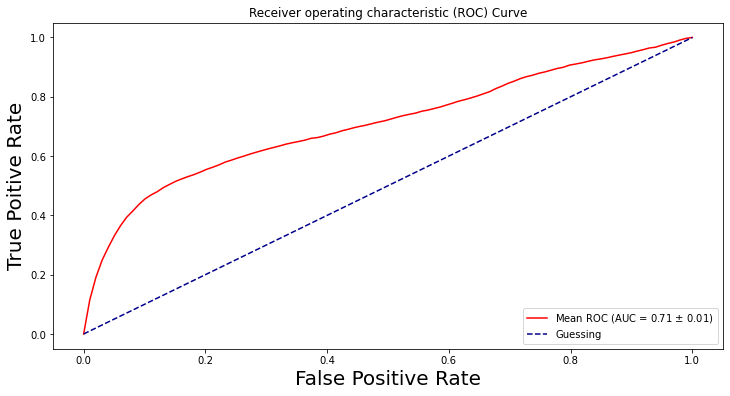

In [16]:
plt.figure(figsize=(12,6))
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
for i in range (len(c_vals)):
    Y_predict_proba = cross_val_C_search_pipe(pipe,c_vals[i])
    fpr,tpr,threshold = roc_curve(Y_test,Y_predict_proba[:,1])
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc_score(Y_test,Y_predict_proba[:,1]))
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr,
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),color="red")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing') # Baseline
plt.title("Receiver operating characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate",size=20)
plt.ylabel("True Poitive Rate",size=20)
plt.show()


_____________________________________________________
**Up next, create interaction features for the case study data using scikit-learn's `PolynomialFeatures`. You should use 2 as the degree of polynomial features. Confirm that the number of new features makes sense.**

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_trans = poly.fit_transform(X)

_____________________________________________________
**Finally, repeat the cross-validation procedure and observe the model performance now.**

In [18]:
# Using the new features, make a 80:20 train/test split using a random seed of 24.**
X_train,X_test,Y_train,Y_test = train_test_split(X_trans,Y,test_size = 0.20,random_state = 24)

In [19]:
# Call the cross_val_C_search_pipe() function using the new training data.
# All other parameters should remain the same.
# Note that this training may take a few minutes due to the larger number of features.
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
for i in range (len(c_vals)):
    Y_predict_proba = cross_val_C_search_pipe(pipe,c_vals[i])
    fpr,tpr,threshold = roc_curve(Y_test,Y_predict_proba[:,1])
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc_score(Y_test,Y_predict_proba[:,1]))
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)

/home/suryanshmishra/Projects/env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


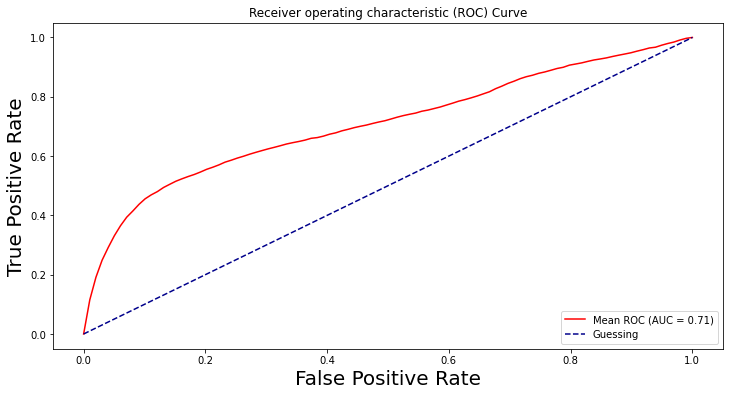

In [19]:
# Plot the average training and testing ROC AUC across folds, for each C value.
plt.figure(figsize=(12,6))
plt.plot(mean_fpr, mean_tpr,
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),color="red")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing') # Baseline
plt.title("Receiver operating characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate",size=20)
plt.ylabel("True Positive Rate",size=20)
plt.show()

**Take a look at the above graph. Does the average cross-validation testing performance improve with the interaction features? Is regularization useful?**